In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappush, heappop
import pandas as pd
from pprint import pprint
import math
import time
import sys
import random
import copy


data1=pd.read_csv('E:/SEMESTER 6/ML-CS60050/Assgnment/Third/AllBooks_baseline_DTM_Labelled.csv') #importing the data
n=len(data1.axes[0]) #to find number of rows in each attribute

data1.drop([13], inplace = True) # removing "Buddhism_Ch14" from Dataframe

data1.reset_index(drop=True, inplace=True) # to adjust indices accordingly

data1["Unnamed: 0"]=data1["Unnamed: 0"].str.replace(r'_Ch', '') # to remove "_Ch" 
data1["Unnamed: 0"] = data1["Unnamed: 0"].str.replace('\d+', '') # to remove number after book name
#print(data1.iloc[0:20,0:])

data_f=data1.drop(data1.columns[0],axis='columns')
#data=data2.iloc[:,:].values
'''data=np.array(data)  # tranforming into numpy array
data=np.float64(data)   
num_rows=data.shape[0]
num_columns=data.shape[1]
for j in range(0,num_columns):  
    count=0
    for i in range(0,num_rows):
    	count+=data[i][j]
    for i in range(0,num_rows):
        data[i][j]=1.0*data[i][j]*math.log(1.0*(1+num_rows)/(1+count))
for i in range(0,num_rows):   #Normalizing each datapoint by dividing by the magnitude
	magnitude=0
	for j in range(0,num_columns):
		magnitude+=data[i][j]*data[i][j]
	magnitude=math.sqrt(magnitude)
	if(magnitude==0):  #There is a single point data point with magnitude zero or which contains an empty row
		continue
	for j in range(0,num_columns):
		data[i][j]/=magnitude
# Data can be used for furthur calculations
print("\n \n print final value of data: ")
print(data[0:15,0:15])'''

print(data_f.head())

   foolishness  hath  wholesome  takest  feelings  anger  vaivaswata  matrix  \
0            0     0          0       0         0      0           0       0   
1            0     0          0       0         0      0           0       0   
2            0     0          0       0         0      0           0       0   
3            0     0          0       0         0      0           0       0   
4            0     0          0       0         0      0           0       0   

   kindled  convict  ...  erred  thinkest  modern  reigned  sparingly  visual  \
0        0        0  ...      0         0       0        0          0       0   
1        0        0  ...      0         0       0        0          0       0   
2        0        0  ...      0         0       0        0          0       0   
3        0        0  ...      0         0       0        0          0       0   
4        0        0  ...      0         0       0        0          0       0   

   thoughts  illumines  attire  

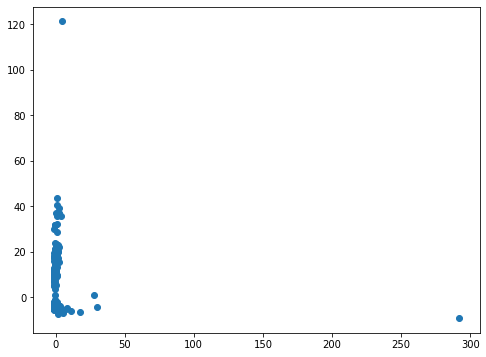

In [2]:
# Importing standardscalar module  
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
  
# fitting 
scalar.fit(data_f) 
scaled_data = scalar.transform(data_f) 
  
# Importing PCA 
from sklearn.decomposition import PCA 
  
# Let's say, components = 2 
pca = PCA(n_components = 100) 
pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data) 
  
#x_pca.shape 
df=x_pca # for k- means clustering
data_agglo=x_pca # for agglomorative clustering
# giving a larger plot

plt.figure(figsize =(8, 6)) 
  
plt.scatter(df[:, 0], df[:, 1]) 
  


In [3]:
num_rows=df.shape[0]
num_columns=df.shape[1]
print(num_columns)

100


In [4]:
# components 
print(pca.components_ )

[[ 0.00012517  0.00027662 -0.00025165 ... -0.00055586  0.00013559
  -0.00046315]
 [ 0.00830466  0.05143159  0.00785073 ... -0.00386448  0.01306237
  -0.00208469]
 [-0.00070921 -0.00305097 -0.00078499 ... -0.00041327 -0.00108242
  -0.00045137]
 ...
 [ 0.0351884  -0.00784858 -0.01914664 ...  0.00697985  0.0054247
  -0.00134704]
 [ 0.01515376  0.01016853 -0.00360317 ... -0.01484709  0.00212439
  -0.00195572]
 [ 0.02841002  0.00831007  0.02381076 ... -0.01275225 -0.01160011
   0.00037473]]


In [5]:
print(x_pca[0:15,:])
#df=x_pca #now df is final array to reduced features

[[ 3.30562130e+00 -3.82496801e+00  4.12236772e+00 ...  2.45190744e+00
   3.53248786e+00  7.71557631e-01]
 [ 9.13657980e-01 -4.03777043e+00  6.46141505e-02 ...  2.53128218e+00
  -6.52012537e-01 -1.76186464e+00]
 [ 1.24879612e+00 -5.01297458e+00  1.40898152e+00 ... -5.13284405e+00
  -5.31807987e+00 -8.28878177e+00]
 ...
 [-1.30163621e+00 -5.14623727e+00 -3.32868658e-01 ... -1.26158336e-01
   6.54235367e-03  3.16295433e-01]
 [-2.73228023e-01 -4.78243376e+00  4.05871792e-01 ... -1.51168940e-01
   1.10850871e+00  3.92456689e-01]
 [-1.29034216e+00 -5.39769852e+00 -5.52354552e-01 ...  8.98158467e-01
   3.26711648e-01  3.47128932e-01]]



 
 print final value of data: 
[[ 2.40558487e-02 -2.78352671e-02  2.99995205e-02  1.05510045e-02
   2.51638083e-04 -4.92920671e-03 -4.20977985e-03  1.19206833e-02
  -8.77080582e-03  5.38735864e-04  3.91872082e-04 -1.72836678e-04
  -9.34953487e-03  1.33881464e-03 -5.06817126e-03]
 [ 7.33391159e-02 -3.24110904e-01  5.18656299e-03  1.73281979e-01
   4.22516571e-02  1.69556752e-03  3.39188249e-02 -4.21675446e-03
   1.01097737e-02  2.05210162e-03 -2.34748217e-02 -6.68224092e-03
   1.98618279e-02  2.46332163e-02  2.82428568e-02]
 [ 3.52658161e-02 -1.41565655e-01  3.97894280e-02  7.82006706e-02
   1.93513103e-02  1.04432315e-02 -7.67606426e-03 -6.62259461e-04
   1.52648431e-02 -1.13923244e-02 -2.41034190e-03 -2.37993400e-02
   3.07399465e-02  8.92512625e-03  2.12641521e-03]
 [ 1.00325187e-01 -4.32315631e-01  1.54042761e-01  2.42038877e-01
   7.51910405e-02  2.52251006e-02  3.13406656e-02  1.92534250e-02
   2.25086862e-02  4.25224535e-03 -1.19199539e-02 -3.18594554e-02
   4.45799702e-02 -5.48

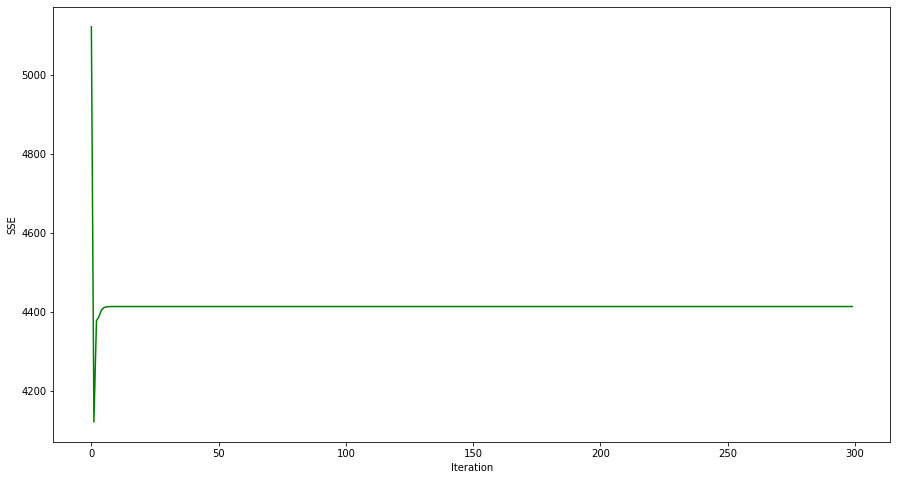

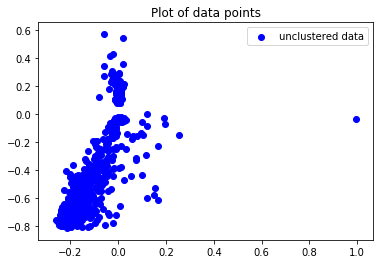

In [6]:
#Applying K-mean used method on this to find 8 clusters

data=np.array(df)  # tranforming into numpy array
data=np.float64(data)   
num_rows=data.shape[0]
num_columns=data.shape[1]
for j in range(0,num_columns):  
    count=0
    for i in range(0,num_rows):
    	count+=data[i][j]
    for i in range(0,num_rows):
        data[i][j]=1.0*data[i][j]*math.log(1.0*(1+num_rows)/(1+count))
for i in range(0,num_rows):   #Normalizing each datapoint by dividing by the magnitude
	magnitude=0
	for j in range(0,num_columns):
		magnitude+=data[i][j]*data[i][j]
	magnitude=math.sqrt(magnitude)
	if(magnitude==0):  #There is a single point data point with magnitude zero or which contains an empty row
		continue
	for j in range(0,num_columns):
		data[i][j]/=magnitude
# Data can be used for furthur calculations
print("\n \n print final value of data: ")
print(data[0:15,0:15])


# In[2]:


def distance(centroids,data,K):
    distance1=np.ones(K)
    for i in range(K):
        distance1[i]=np.dot(centroids[i],data) # centroid was not normalise so we need to normlised it.
        dinominator=np.sqrt(np.dot(centroids[i],centroids[i])*np.dot(data,data)) # data was already normalised so np.dot(data,data)=1.
        distance1[i]=distance1[i]/dinominator
    return(np.exp(-distance1))


# In[3]:


K=8  # to obtain K=8 clusters of documents
iterations=300
num_rows1=data.shape[0]
num_columns1=data.shape[1]

centroids=np.random.rand(K,num_columns1)


# In[12]:



belongs_to=np.ones(len(data))
SSE=np.zeros(iterations)

for itr in range(iterations):
    for i in range(len(data)):
        distances=distance(centroids,data[i],K)

        SSE[itr]+=(distances.sum())

        min_dist_index=0
        min_dist=distances[0]
        for j in range(1,K):
            if(distances[j]<min_dist):
                min_dist=distances[j]
                min_dist_index=j

        belongs_to[i]=min_dist_index


    centroids[:]=0
    count=np.zeros(K)
    for i in range(len(belongs_to)):
        centroids[int(belongs_to[i])]+=data[i]
        count[int(belongs_to[i])]+=1

    for i in range(K):
        if(count[i]!=0):
            centroids[i]/=count[i]

        
    cluster=[[],[],[],[],[],[],[],[]]
    for i in range(len(belongs_to)):
        cluster[int(belongs_to[i])].append(i)
        
    sorted_cluster=sorted(cluster)
        
#return(sorted_cluster,centroids,SSE)


# In[13]:


Output=sorted_cluster
print(Output)


# In[6]:


#import matplotlib.pyplot as plt
plt.figure(figsize=[15,8])
plt.plot(range(iterations),SSE,c='g')
plt.xlabel('Iteration')
plt.ylabel('SSE')
plt.show()


# In[7]:


f=open("E:/SEMESTER 6/ML-CS60050/Assgnment/Third/kmeans_reduced.txt",'w')
for i in range(8):
    for j in sorted_cluster[i]:
        f.write(str(j))
        f.write(",")
    f.write("\n")
f.close()


# In[8]:


plt.scatter(data[:,0],data[:,1],c='blue',label='unclustered data')
#plt.xlabel('Rows')
#plt.ylabel('columns')
plt.legend()
plt.title('Plot of data points')
plt.show()






In [9]:
# Applying heirarical method on data_agglo array




def cosine_similarity_distance(point_1, point_2): # to find distance
    distance=0.0
    distance=np.dot(point_1, point_2)
    dinominator=np.sqrt(np.dot(point_1,point_1)*np.dot(point_2,point_2))
    distance=distance/dinominator
    
    return(np.exp(-distance))
    
    

def add_points(point_1, point_2):
    for i in range(0, len(point_1)):
        point_1[i] = float(point_1[i]) + float(point_2[i])
    return point_1


# In[3]:


data_a=data_agglo

k_value=8 # no. of cluster =8
#distances=[]
distances=[]
for i in range(len(data_a)):
    row=[]
    for j in range(i):
        row.append(cosine_similarity_distance(data_a[i],data_a[j]))
    distances.append(row)
    del(row)


cluster=[]
for i in range(len(data)):
    cluster.append([i])

while(len(cluster)>k_value): 
    min1=10000
    combine=[0,1]
    for i in range(len(cluster)):
        for j in range(i+1,len(cluster)):
            #temp=single_linkage(cluster,distances,i,j)
            min_value=1000
            for m in cluster[i]:
                for n in cluster[j]:
                    if(m>n):
                        if(min_value>distances[m][n]):
                            min_value=distances[m][n]
                        else:
                            min_value=distances[n][m]
            temp=min_value  
        
            
            if(min1>temp):
                min1=temp
                combine[0]=i
                combine[1]=j
    cluster[combine[0]]=cluster[combine[0]]+cluster[combine[1]]
    del(cluster[combine[1]])
       
sorted_cluster=sorted(cluster)


# In[4]:


#k_value=8 # 8 cluster we taking here
#agglomerative_local(data2, k_value)
#cluster=centroid_points
#for i in range(len(cluster)):
#    cluster[i]=sorted(cluster[i]) # sorting each row of final cluster or say centroid point

#sorted_cluster=sorted(cluster) # sorting the final value
print('cluster size: ',len(sorted_cluster))
j=1
for i in sorted_cluster: # total 8 cluster
    print("#")
    #print("cluster-",j,"=",i)
    #print("\n \n")
    #j=j+1
for i in sorted_cluster: # total 8 cluster
    print("#")
    print("cluster-",j,"=",i)
    print("\n \n")
    j=j+1    


# In[5]:


f=open("E:/SEMESTER 6/ML-CS60050/Assgnment/Third/agglomerative_reduced.txt",'w')
for i in range(len(sorted_cluster)):
    for j in sorted_cluster[i]:
        f.write(str(j))
        f.write(",")
    f.write("\n")
f.close()  
# Actual code ends here







cluster size:  8
#
#
#
#
#
#
#
#
#
cluster- 1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 2

In [8]:
len(data_a[0])

100